In [11]:
import numpy as np

x=np.load("variables/x.npy")
y=np.load("variables/y.npy")
x_train=np.load("variables/x_train.npy")
x_test=np.load("variables/x_test.npy")
y_test=np.load("variables/y_test.npy")
y_train=np.load("variables/y_train.npy")

In [12]:
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

## MULTI-LAYERED PERCEPTRON(MLP):

In [13]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(random_state=1, max_iter=300).fit(x_train, y_train)
mlp.predict(x_test[:1])

array([1])

### Validation croisée:

In [14]:
from sklearn.model_selection import cross_val_score

def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())
    
mlp_scores = cross_val_score(mlp, x, y, cv=10, scoring="f1")

display_scores(mlp_scores)

Scores: [1.        1.        1.        0.9929078 0.9929078 1.        1.
 1.        1.        1.       ]
Mean: 0.9985815602836879
Standard deviation: 0.0028368794326241176


### GridSearchCV
Afin de trouver les meilleurs paramètres, nous allons utiliser la méthode d'optimisation GridSearchCV.

In [15]:
%%capture --no-display
from sklearn.model_selection import GridSearchCV

# Create list of hyperparameters 
parameter_space = {
    'hidden_layer_sizes': [(50,50,50), (50,100,50), (100,)],
    'activation': ['tanh', 'relu','logistic'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}
# Use Grid search CV to find best parameters using 4 jobs

grid_search = GridSearchCV(mlp, parameter_space, n_jobs=-1, cv=3)
grid_search.fit(x_train, y_train)


GridSearchCV(cv=3, estimator=MLPClassifier(max_iter=300, random_state=1),
             n_jobs=-1,
             param_grid={'activation': ['tanh', 'relu', 'logistic'],
                         'alpha': [0.0001, 0.05],
                         'hidden_layer_sizes': [(50, 50, 50), (50, 100, 50),
                                                (100,)],
                         'learning_rate': ['constant', 'adaptive'],
                         'solver': ['sgd', 'adam']})

In [5]:
print("Best Score: ")
print(grid_search.best_score_)
print("Best Estimator: ")
print(grid_search.best_estimator_)
print("Best Params: ")
print(grid_search.best_params_)

Best Score: 
0.9696712018140589
Best Estimator: 
MLPClassifier(activation='tanh', alpha=0.05, max_iter=300, random_state=1)
Best Params: 
{'activation': 'tanh', 'alpha': 0.05, 'hidden_layer_sizes': (100,), 'learning_rate': 'constant', 'solver': 'adam'}


### MLP Optimisé :

In [18]:
best_mlp = grid_search.best_estimator_

In [19]:
best_mlp.fit(x_train, y_train)
best_mlp.predict(x_test[:10])

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


array([1, 0, 0, 0, 1, 0, 0, 0, 0, 0])

### VALIDATION CROISEE DU MLP OPTI :

In [20]:
%%capture --no-display
from sklearn.model_selection import cross_val_score

def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())
    
best_mlp_scores = cross_val_score(best_mlp, x, y, cv=10, scoring="f1")



In [21]:
display_scores(best_mlp_scores)

Scores: [0.9929078 1.        1.        1.        0.9929078 1.        1.
 1.        1.        1.       ]
Mean: 0.9985815602836879
Standard deviation: 0.0028368794326241176


### Matrice de Confusion


Nous allons maintenant utiliser afin d'étudier les performances de notre système de classification supervisé. Calculons maintenant cette matrice avec notre modèle amélioré.

In [23]:
%%capture --no-display
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(best_mlp, x_train, y_train, cv=10)



In [24]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_train, y_train_pred)

array([[2943,   13],
       [  30,  542]], dtype=int64)

### Recall et precision avec threshold
Affichons les valeurs du recall et de la précision en fonction du seuil ainsi que la valeur de la précision en fonction du recall

In [25]:
from sklearn.metrics import precision_score, recall_score, f1_score
precision_score(y_train, y_train_pred)

0.9765765765765766

In [26]:
recall_score(y_train, y_train_pred)

0.9475524475524476

In [27]:
from sklearn.metrics import f1_score
f1_score(y_train, y_train_pred) 

0.9618456078083407

In [17]:
from sklearn.metrics import f1_score
f1_score(y_train, y_train_pred) 

In [29]:
%%capture --no-display

y_scores = cross_val_predict(best_mlp, x_train, y_train_pred, cv=10,
                            method="predict")

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer

In [30]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train, y_scores)

In [31]:
precisions, recalls, thresholds

(array([0.16213152, 0.97992701, 1.        ]),
 array([1.        , 0.93881119, 0.        ]),
 array([0, 1]))

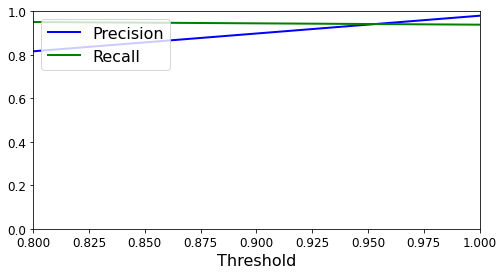

In [38]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b-", label="Precision", linewidth=2)
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
    plt.xlabel("Threshold", fontsize=16)
    plt.legend(loc="upper left", fontsize=16)
    plt.ylim([0, 1])

plt.figure(figsize=(8, 4))
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.xlim([0.8, 1])
#save_fig("precision_recall_vs_threshold_plot")
plt.show()

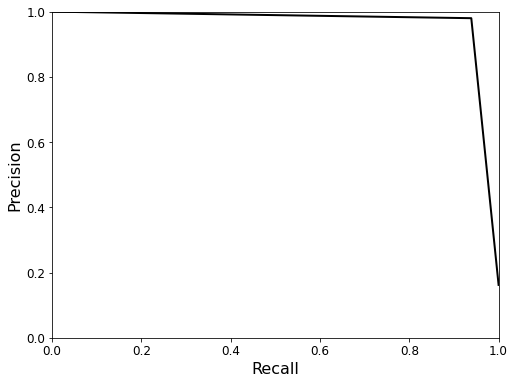

In [39]:
def plot_precision_vs_recall(precisions, recalls):
    plt.plot(recalls, precisions, "k-", linewidth=2)
    plt.xlabel("Recall", fontsize=16)
    plt.ylabel("Precision", fontsize=16)
    plt.axis([0, 1, 0, 1])

plt.figure(figsize=(8, 6))
plot_precision_vs_recall(precisions, recalls)
#save_fig("precision_vs_recall_plot")
plt.show()

In [40]:
from numpy import argmax
fscore = (2 * precisions * recalls) / (precisions + recalls)
ix = argmax(fscore)
print('Best Threshold=%f, F-Score=%.3f' % (thresholds[ix], fscore[ix]))
logisitc_reg_thresholds = thresholds[ix]


Best Threshold=1.000000, F-Score=0.959


### Courbe ROC 
Affichons la courbe roc afin de confronter notre taux de vrai positif par rapport au taux de faux positif. plus la courbe se rapproche du coin supérieur gauche, plus notre taux de vrai positif est idéal, et on évite un maximum de faux positif. On utilise l'air sous la courbe ROC afin de comparer nos modèles, qui doit être le plus proche de 1.

In [41]:
from sklearn.metrics import roc_curve

fpr_mlp, tpr_mlp, thresholds = roc_curve(y_train, y_scores)

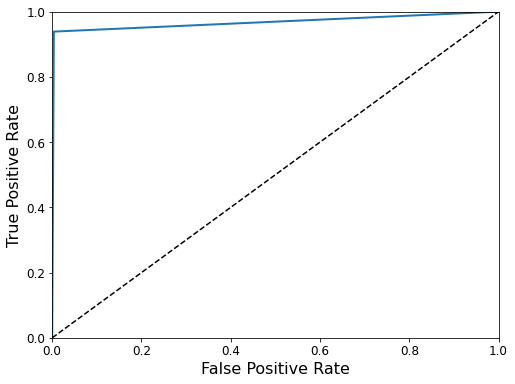

In [42]:
def plot_roc_curve(fpr_mlp, tpr_mlp, label=None):
    plt.plot(fpr_mlp, tpr_mlp, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)

plt.figure(figsize=(8, 6))
plot_roc_curve(fpr_mlp, tpr_mlp)
#save_fig("roc_curve_plot")
plt.show()

In [43]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train, y_scores)

0.9675449719428069

In [44]:
np.save('variables/fpr_mlp.npy', fpr_mlp)
np.save('variables/tpr_mlp.npy', tpr_mlp)
np.save('variables/best_mlp.npy', best_mlp)


In [45]:
import pickle
filename = 'variables/mlp_model.sav'
pickle.dump(best_mlp, open(filename, 'wb'))